In [1]:
import numpy as np 
import pandas as pd 
import os
import sys
sys.path.append('/home/lucas/Documents/Log_Analysis')
import analog
sys.path.append('/home/lucas/Documents/Log_Analysis/Battery')
from battery import OCVcurve, segment
from analog import logextract
import datetime
import matplotlib.pyplot as plt
%matplotlib notebook
import csv

In [20]:
log_path = '/home/lucas/Documents/Log_Analysis/Battery'
print(os.listdir(log_path))
file1 = f'{log_path}/2019-09-20_1_LiHV - Discharge.csv'
#file2 = f'{log_path}/2019-09-06_1_LiHV - Discharge-part2.csv'
#file3 = f'{log_path}/2019-09-09_1_LiHV - Discharge-part3.csv'
file1_charge = f'{log_path}/2019-09-10_1_LiHV - Charge-part1.csv' 
file2_charge = f'{log_path}/2019-09-10_1_LiHV - Charge-part2.csv' 
file3_charge = f'{log_path}/2019-09-11_1_LiHV - Charge-part3.csv' 

['resistancetestz0.ulg', 'Battery Simulation.ipynb', 'Equivalent Circuit Parameters Estimation-z0.ipynb', 'Static parameters estimation.ipynb', 'SOCvsOCV.csv', 'log_297_2019-9-3-15-14-02.ulg', 'log_296_2019-9-3-15-11-56.ulg', 'motor_test_compressed.txt', 'Rough EC Dynamic Params Estimation.ipynb', 'log_119_variancetest.ulg', '.ipynb_checkpoints', 'log_299_2019-9-3-15-22-14.ulg', '2019-09-09_1_LiHV - Discharge-part3.csv', 'SOCvsOCV_discharge600mA', 'battery_test_compressed.txt', 'motor_test.log', '2019-09-06_1_LiHV - Discharge-part1.csv', '2019-09-11_1_LiHV - Charge-part3.csv', 'battery.py', 'SOC estimator couloumb counting.ipynb', 'EC dynamic parameters estimation.ipynb', 'log_298_2019-9-3-15-24-50.ulg', '2019-09-06_1_LiHV - Discharge-part2.csv', '2019-09-10_1_LiHV - Charge-part1.csv', 'SOCvsOCV_charge200mA', 'log_295_2019-9-3-15-07-46.ulg', '2019-09-10_1_LiHV - Balance-Charge-part1.csv', 'Q200', '__pycache__', '2019-09-10_1_LiHV - Charge-part2.csv', 'Voltage sensor variance estimation

In [21]:
seg1 = segment(path2csv=file1,mode='discharge')
#seg2 = segment(path2csv=file2,mode='discharge')
#seg3 = segment(path2csv=file3,mode='discharge')

In [4]:
seg1_charge = segment(path2csv=file1_charge,mode='charge')
seg2_charge = segment(path2csv=file2_charge,mode='charge')
seg3_charge = segment(path2csv=file3_charge,mode='charge')

In [22]:
print(seg1_charge.cell_voltage)
#print(seg2_charge.cell_voltage)
#print(seg3_charge.cell_voltage)

0      3.388
1      3.392
2      3.388
3      3.390
4      3.389
       ...  
663    3.401
664    3.396
665    3.398
666    3.401
667    3.398
Name: CellVoltage 1 [V], Length: 668, dtype: float64


<IPython.core.display.Javascript object>


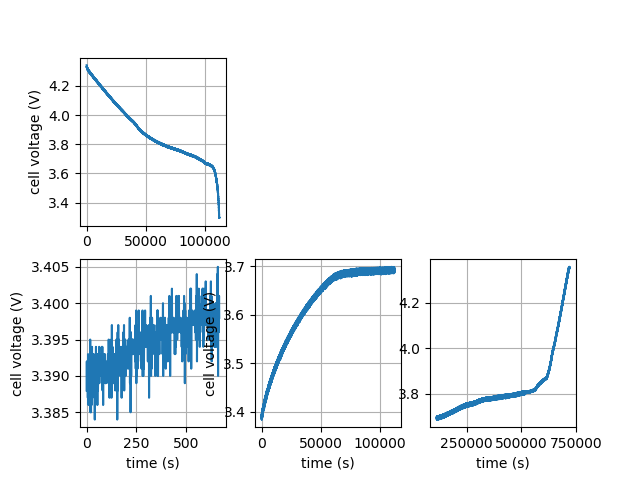

In [23]:
plt.figure()
plt.subplot(231)
seg1.vplot()
plt.ylabel('cell voltage (V)')

#plt.subplot(232)
#seg2.vplot()

#plt.subplot(233)
#seg3.vplot()

plt.subplot(234)
seg1_charge.vplot()
plt.xlabel('time (s)')
plt.ylabel('cell voltage (V)')

plt.subplot(235)
seg2_charge.vplot()
plt.xlabel('time (s)')
plt.ylabel('cell voltage (V)')

plt.subplot(236)
seg3_charge.vplot()
plt.xlabel('time (s)')
plt.show()

In [24]:
#discharge = seg1.concatenate(seg2.concatenate(seg3))
discharge = seg1

In [25]:
charge = seg1_charge.concatenate(seg2_charge.concatenate(seg3_charge))

<IPython.core.display.Javascript object>


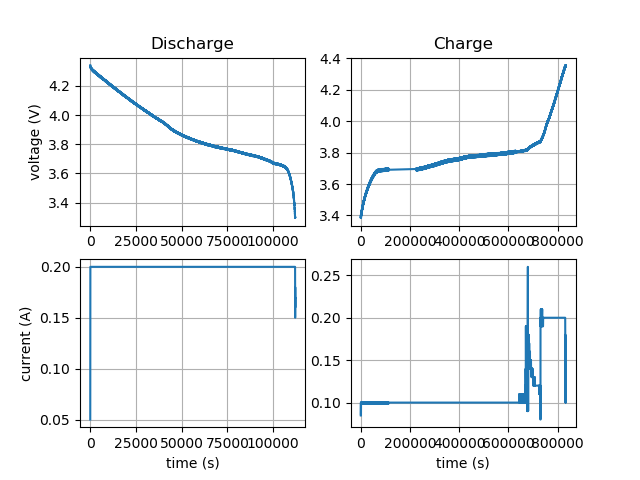

discharge


In [26]:
plt.figure()
plt.subplot(221)
discharge.vplot(label='discharge')
plt.ylabel('voltage (V)')
plt.title('Discharge')
plt.subplot(222)
charge.vplot(label='charge')
plt.title('Charge')
plt.subplot(223)
discharge.cplot(label='discharge')
plt.xlabel('time (s)')
plt.ylabel('current (A)')

plt.subplot(224)
charge.cplot(label='charge')
plt.xlabel('time (s)')
plt.show()

print(discharge.mode)

In [27]:
charge.count_charge(0)
discharge.count_charge(1)

print(f'Total discharge capacity is {round(discharge.Q/3.6,2)} mAh')
print(f'Total charge capacity is {round(charge.Q/3.6,2)} mAh')
eta = discharge.Q/charge.Q
print(eta)

Total discharge capacity is 6229.15 mAh
Total charge capacity is 26481.16 mAh
0.23522946199778458


<IPython.core.display.Javascript object>


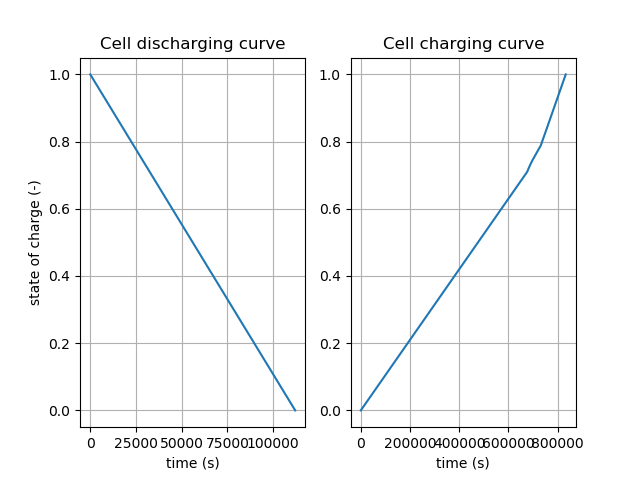

In [28]:
%matplotlib notebook
plt.figure()
plt.subplot(121)
discharge.zplot()
plt.xlabel('time (s)')
plt.ylabel('state of charge (-)')
plt.title('Cell discharging curve')
plt.subplot(122)
charge.zplot()
plt.xlabel('time (s)')
plt.title('Cell charging curve')
plt.show()

In [29]:
charge_OCV = OCVcurve()
charge_OCV.fromsegment(charge)
discharge_OCV = OCVcurve()
discharge_OCV.fromsegment(discharge)

R0 = 0.0123
charge_OCV.intrescorr(R0)
discharge_OCV.intrescorr(R0)

In [30]:
print(charge_OCV.SOC)

0         0.000000
1         0.000001
2         0.000002
3         0.000003
4         0.000004
            ...   
720741    0.999995
720742    0.999996
720743    0.999997
720744    0.999999
720745    1.000000
Length: 720746, dtype: float64


<IPython.core.display.Javascript object>


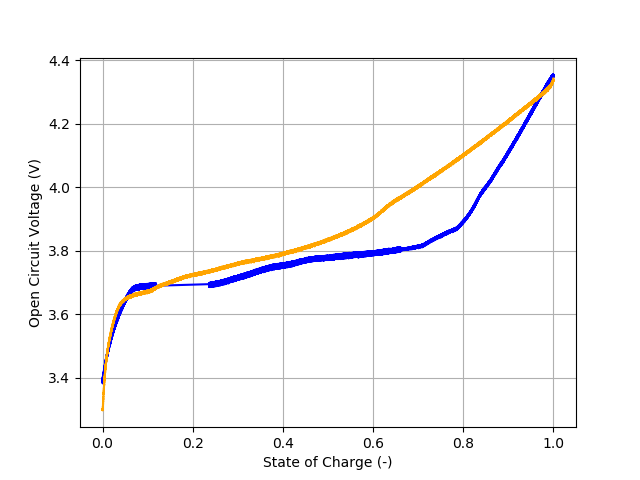

In [31]:
plt.figure()
charge_OCV.plot()
discharge_OCV.plot(color='orange')
plt.grid()

In [32]:
csv_file = open(f'SOCvsOCV_{charge_OCV.mode}200mA.csv','w')
writer = csv.writer(csv_file)
writer.writerow(['SOC','OCV'])
for k in range(len(charge_OCV.SOC)):
    writer.writerow([charge_OCV.SOC.values[k],charge_OCV.OCV.values[k]])

In [33]:
csv_file = open(f'SOCvsOCV_{discharge_OCV.mode}200mA.csv','w')
writer = csv.writer(csv_file)
writer.writerow(['SOC','OCV'])
for k in range(len(discharge_OCV.SOC)):
    writer.writerow([discharge_OCV.SOC.values[k],discharge_OCV.OCV.values[k]])

# OCV curve comparison

In [34]:
OCV1 = pd.read_csv('SOCvsOCV_charge200mA')
OCV2 = pd.read_csv('SOCvsOCV_discharge600mA')
OCV3 = pd.read_csv('SOCvsOCV_discharge200mA')

<IPython.core.display.Javascript object>


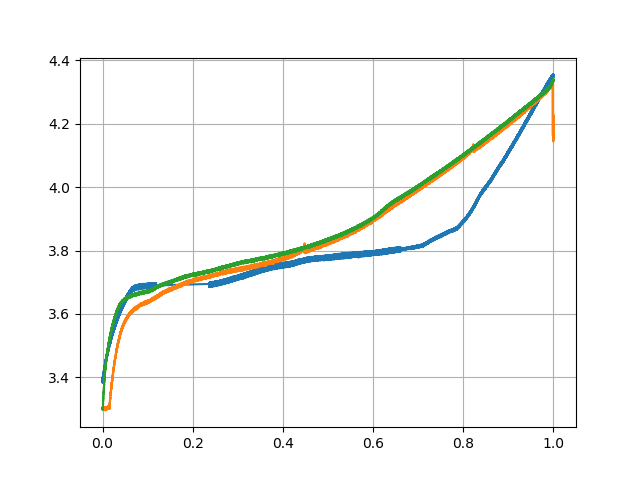

In [35]:
plt.figure()
plt.plot(OCV1['SOC'],OCV1['OCV'])
plt.plot(OCV2['SOC'],OCV2['OCV'])
plt.plot(OCV3['SOC'],OCV3['OCV'])
plt.grid()

In [ ]:
p = np.polyfit([charge_OCV.SOC,discharge_OCV.SOC],[],11)
#p = np.polyfit(z[:-2000],OCV[:-2001],11)
print(z.iloc[-1500])

In [ ]:
plt.figure()
plt.plot(z,cell_voltage[1:],label='measured')
plt.plot(z,OCV[1:],linestyle='--',label='without R0')
plt.plot(z,np.polyval(p,z),label='polynomial')
plt.legend()
plt.grid()
plt.xlabel('State of Charge (-)')
plt.ylabel('OCV (V)')

In [ ]:
import csv 
csv_file = open('SOCvsOCV.csv','w')
writer = csv.writer(csv_file)
writer.writerow(['SOC','OCV'])
for k in range(len(z)):
    writer.writerow([z.values[k],np.polyval(p,z.values[k])])

In [ ]:
plt.figure()
plt.plot(stime_charge,z_charge)

In [ ]:
x = pd.Series(1)
print(x)

In [ ]:
x.append(1 -charge.dq)